# Proyecto de Clustering de Imágenes

Este proyecto tiene como objetivo aplicar diferentes algoritmos de clustering (KMeans, Clustering Jerárquico y Gaussian Mixtures) para reducir la paleta de colores de una imagen y luego recomponerla utilizando estos algoritmos.

## Objetivos:
- Cargar una imagen y aplicar los algoritmos de clustering.
- Recomponer la imagen utilizando una paleta de colores reducida.
- Comparar los resultados obtenidos con distintos algoritmos.


## 1. Importación de Librerías

En esta sección importamos las librerías necesarias para la carga, procesamiento de imágenes, y la implementación de algoritmos de clustering.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from skimage.io import imread, imsave
from skimage.transform import resize



## 2. Cargar y Preprocesar la Imagen

A continuación, cargamos la imagen en formato `.jpg`, la redimensionamos y la normalizamos para facilitar el procesamiento. Esto permite que los algoritmos de clustering puedan trabajar eficientemente con los datos.


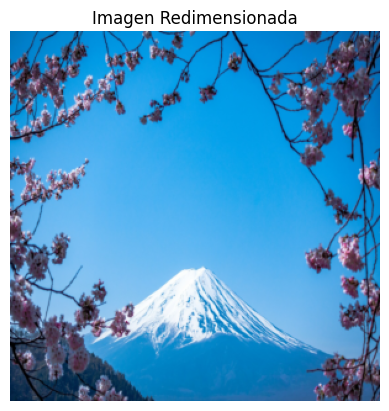

In [10]:
# Cargar la imagen desde la carpeta 'data/'
image_path = 'data/image.jpg'
image = imread(image_path)

# Redimensionar la imagen a 300x300 píxeles para mantener buena calidad
image_resized = resize(image, (300, 300))

# Convertir la imagen a una matriz de píxeles
pixels = image_resized.reshape(-1, 3)

# Normalizar los valores de los píxeles (entre 0 y 1)
if pixels.max() > 1:
    pixels = pixels / 255.0

# Mostrar la imagen original redimensionada
plt.imshow(image_resized)
plt.axis('off')
plt.title("Imagen Redimensionada")
plt.show()


## 3. Determinación del Número Óptimo de Clusters (Método del Codo)

Para aplicar correctamente el algoritmo **KMeans**, es importante seleccionar el número óptimo de clusters. Utilizamos el método del codo para encontrar este valor.


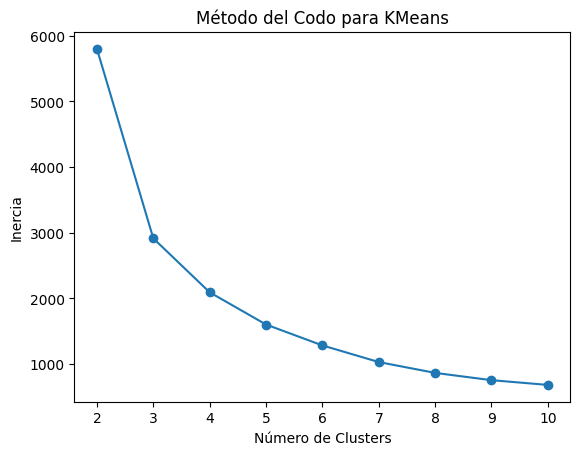

In [11]:
# Determinar el número óptimo de clusters con el método del codo
inertia = []
k_values = range(2, 11)  # Evaluar entre 2 y 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)

# Graficar el Scree Plot
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para KMeans')
plt.show()


## 4. Aplicar KMeans y Obtener la Paleta de Colores

Con el número óptimo de clusters determinado, aplicamos **KMeans** para agrupar los colores de la imagen y obtener la paleta de colores reducida.


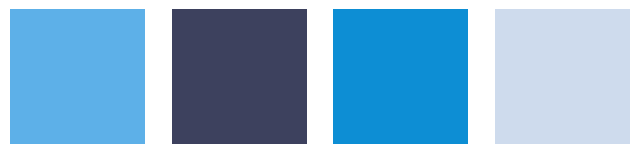

In [12]:
# Aplicar KMeans con el número óptimo de clusters (por ejemplo, 4 clusters)
optimal_k = 4  # Cambiar este valor según los resultados del método del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pixels)

# Obtener la paleta de colores
palette = np.clip(kmeans.cluster_centers_, 0, 1)

# Mostrar la paleta de colores obtenida
fig, ax = plt.subplots(1, optimal_k, figsize=(optimal_k*2, 2))

for i, color in enumerate(palette):
    ax[i].imshow([[color]])  # Cada color en la paleta se visualiza como una imagen de un solo píxel
    ax[i].axis('off')

plt.show()


## 5. Recomposición de la Imagen utilizando la Paleta Reducida de KMeans

Utilizamos la paleta de colores obtenida de **KMeans** para recomponer la imagen original, mapeando los píxeles de acuerdo con los clusters obtenidos.


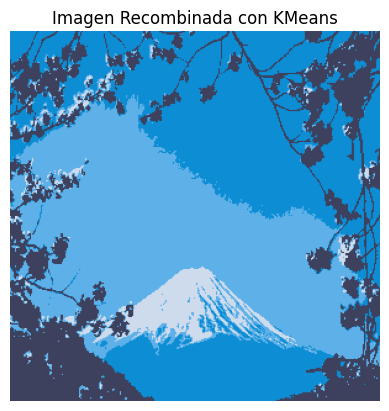

In [13]:
# Etiquetas asignadas a cada píxel
labels = kmeans.predict(pixels)

# Recomponer la imagen utilizando la paleta de colores obtenida
reconstructed_image = palette[labels].reshape(image_resized.shape)

# Desnormalizar la imagen para que los valores estén entre 0 y 255
reconstructed_image_uint8 = (reconstructed_image * 255).astype(np.uint8)

# Mostrar la imagen recombinada
plt.imshow(reconstructed_image_uint8)
plt.axis('off')
plt.title("Imagen Recombinada con KMeans")
plt.show()

# Guardar la imagen recombinada
imsave('output/reconstructed_image_kmeans.jpg', reconstructed_image_uint8)


## 6. Aplicar Clustering Jerárquico

A continuación, aplicamos el algoritmo de **Clustering Jerárquico** para agrupar los colores de la imagen y compararemos los resultados con KMeans.


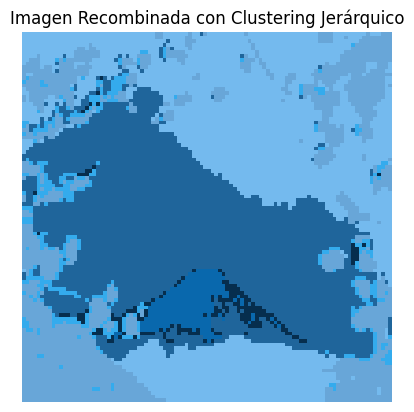

In [27]:
# Redimensionar la imagen a un tamaño más pequeño (100x100 píxeles)
image_resized = resize(image, (100, 100))
pixels = image_resized.reshape(-1, 3)

# Tomar una muestra aleatoria del 10% de los píxeles
sample_size = int(0.1 * len(pixels))  # 10% de los píxeles
random_indices = np.random.choice(len(pixels), sample_size, replace=False)
sample_pixels = pixels[random_indices]

# Aplicar Clustering Jerárquico a la muestra de píxeles
optimal_k = 6  # Ajusta este valor según tu análisis
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='average')
hierarchical_labels_sample = hierarchical.fit_predict(sample_pixels)

# Asignar las etiquetas a todos los píxeles utilizando el modelo ajustado
hierarchical_labels = hierarchical.fit_predict(pixels)

# Generar una nueva paleta de colores
unique_labels = np.unique(hierarchical_labels)
new_palette = np.clip(sample_pixels[:len(unique_labels)], 0, 1)

# Recomponer la imagen utilizando las etiquetas de Clustering Jerárquico
reconstructed_image_hierarchical = new_palette[hierarchical_labels].reshape(image_resized.shape)

# Desnormalizar la imagen para que los valores estén entre 0 y 255
reconstructed_image_hierarchical_uint8 = (reconstructed_image_hierarchical * 255).astype(np.uint8)

# Mostrar la imagen recombinada con Clustering Jerárquico
plt.imshow(reconstructed_image_hierarchical_uint8)
plt.axis('off')
plt.title("Imagen Recombinada con Clustering Jerárquico")
plt.show()

# Guardar la imagen recombinada
imsave('output/reconstructed_image_hierarchical.jpg', reconstructed_image_hierarchical_uint8)

## 7. Aplicar Gaussian Mixtures

Finalmente, aplicamos el algoritmo de **Gaussian Mixtures (GMM)** para agrupar los colores de la imagen y recomponerla.


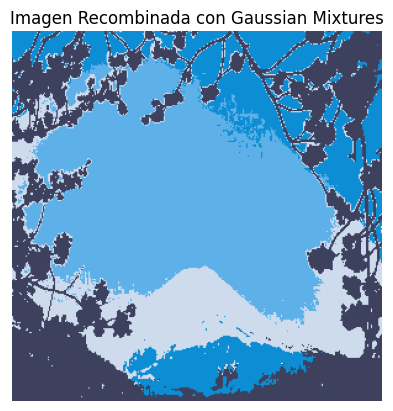

In [14]:
# Aplicar Gaussian Mixtures
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(pixels)

# Etiquetas de Gaussian Mixtures
gmm_labels = gmm.predict(pixels)

# Recomponer la imagen utilizando Gaussian Mixtures
reconstructed_image_gmm = palette[gmm_labels].reshape(image_resized.shape)

# Desnormalizar la imagen para que los valores estén entre 0 y 255
reconstructed_image_gmm_uint8 = (reconstructed_image_gmm * 255).astype(np.uint8)

# Mostrar la imagen recombinada con Gaussian Mixtures
plt.imshow(reconstructed_image_gmm_uint8)
plt.axis('off')
plt.title("Imagen Recombinada con Gaussian Mixtures")
plt.show()

# Guardar la imagen recombinada
imsave('output/reconstructed_image_gmm.jpg', reconstructed_image_gmm_uint8)


## 8. Aplicar Gaussian Mixtures

Finalmente, aplicamos el algoritmo de **Gaussian Mixtures (GMM)** para agrupar los colores de la imagen y recomponerla. Este método permite modelar los datos asumiendo que provienen de una mezcla de distribuciones gaussianas, lo que lo hace más flexible que KMeans o Clustering Jerárquico.


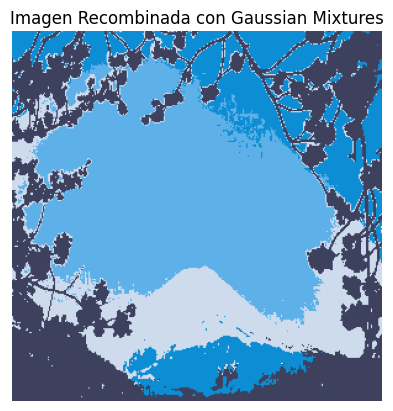

In [18]:
from sklearn.mixture import GaussianMixture

# Aplicar Gaussian Mixtures con el número óptimo de clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(pixels)

# Recomponer la imagen utilizando Gaussian Mixtures
reconstructed_image_gmm = palette[gmm_labels].reshape(image_resized.shape)

# Desnormalizar la imagen para que los valores estén entre 0 y 255
reconstructed_image_gmm_uint8 = (reconstructed_image_gmm * 255).astype(np.uint8)

# Mostrar la imagen recombinada con Gaussian Mixtures
plt.imshow(reconstructed_image_gmm_uint8)
plt.axis('off')
plt.title("Imagen Recombinada con Gaussian Mixtures")
plt.show()

# Guardar la imagen recombinada
imsave('output/reconstructed_image_gmm.jpg', reconstructed_image_gmm_uint8)


## 9. Comparación de Resultados

En esta sección, comparamos los resultados obtenidos utilizando los tres métodos de clustering: **KMeans**, **Clustering Jerárquico**, y **Gaussian Mixtures**. Analizaremos las diferencias visuales entre los métodos y discutiremos sus ventajas y desventajas en el contexto del procesamiento de imágenes.


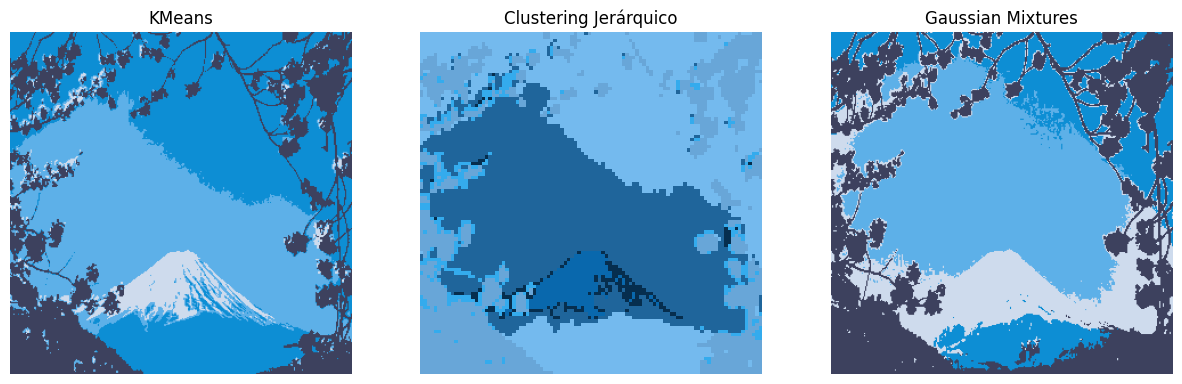

In [28]:
# Verificar si todas las imágenes están definidas antes de la comparación
if 'reconstructed_image_uint8' not in locals():
    print("Imagen con KMeans no está definida. Verifica que hayas ejecutado correctamente la sección de KMeans.")
if 'reconstructed_image_hierarchical_uint8' not in locals():
    print("Imagen con Clustering Jerárquico no está definida. Verifica que hayas ejecutado correctamente la sección de Clustering Jerárquico.")
if 'reconstructed_image_gmm_uint8' not in locals():
    print("Imagen con Gaussian Mixtures no está definida. Verifica que hayas ejecutado correctamente la sección de Gaussian Mixtures.")

# Mostrar todas las imágenes recombinadas juntas para comparación
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Imagen recombinada con KMeans
if 'reconstructed_image_uint8' in locals():
    ax[0].imshow(reconstructed_image_uint8)
    ax[0].axis('off')
    ax[0].set_title("KMeans")
else:
    ax[0].text(0.5, 0.5, 'KMeans no disponible', horizontalalignment='center', verticalalignment='center')
    ax[0].axis('off')

# Imagen recombinada con Clustering Jerárquico
if 'reconstructed_image_hierarchical_uint8' in locals():
    ax[1].imshow(reconstructed_image_hierarchical_uint8)
    ax[1].axis('off')
    ax[1].set_title("Clustering Jerárquico")
else:
    ax[1].text(0.5, 0.5, 'Clustering Jerárquico no disponible', horizontalalignment='center', verticalalignment='center')
    ax[1].axis('off')

# Imagen recombinada con Gaussian Mixtures
if 'reconstructed_image_gmm_uint8' in locals():
    ax[2].imshow(reconstructed_image_gmm_uint8)
    ax[2].axis('off')
    ax[2].set_title("Gaussian Mixtures")
else:
    ax[2].text(0.5, 0.5, 'Gaussian Mixtures no disponible', horizontalalignment='center', verticalalignment='center')
    ax[2].axis('off')

plt.show()


## 10. Conclusiones

Tras haber aplicado y comparado los tres algoritmos de clustering, hemos observado las siguientes diferencias:

- **KMeans**: Genera particiones con bordes más definidos, pero puede ser menos preciso en áreas complejas de la imagen.
- **Clustering Jerárquico**: Tiende a capturar más detalles y relaciones jerárquicas entre los clusters, pero es computacionalmente más costoso.
- **Gaussian Mixtures**: Proporciona una representación más suave de los clusters, ya que no asigna bruscamente un punto a un solo cluster, sino que usa probabilidades para cada punto.

Dependiendo del objetivo del análisis de la imagen, cada método puede ser más o menos adecuado.
